In [2]:
import os

In [3]:
os.system('pip install scikit-learn')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 19.8 MB/s eta 0:00:00


0

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

In [9]:
iris = load_iris()
iris['frame']

In [12]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [14]:
iris_df['target'] = iris['target']

In [15]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


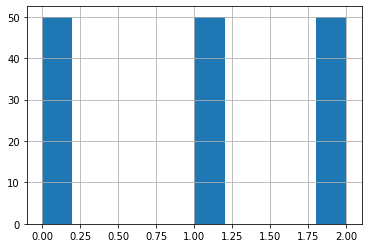

In [26]:
iris_df["target"].hist();

On a bien un jeu de données équilibré avec 50 fleurs de chaque type.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = iris['data']
y = iris['target']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
model = DecisionTreeClassifier()

In [66]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
model.score(X_test, y_test)

0.9736842105263158

In [68]:
model.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [69]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [70]:
model.predict(X_test) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [51]:
from sklearn.model_selection import cross_validate

In [52]:
model = DecisionTreeClassifier()

In [71]:
cv = cross_validate(model, X, y, cv=10)

In [72]:
cv

{'fit_time': array([0.00064158, 0.00058842, 0.00052071, 0.00051451, 0.00040793,
        0.00039625, 0.00035858, 0.00040245, 0.0003891 , 0.00034952]),
 'score_time': array([0.00041914, 0.0002656 , 0.00036025, 0.00022674, 0.00022268,
        0.00023317, 0.00025082, 0.00023651, 0.00027752, 0.0002811 ]),
 'test_score': array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
        0.86666667, 0.93333333, 1.        , 1.        , 1.        ])}

In [75]:
cv['test_score'].mean()

0.96

In [76]:
## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model = RandomForestClassifier()

In [89]:
cv = cross_validate(model, X, y, cv=10)

In [90]:
cv['test_score'].mean()

0.96

In [91]:
## KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
model = KNeighborsClassifier()

In [94]:
def test_model(model):
    cv = cross_validate(model, X, y, cv=10)
    return cv['test_score'].mean()

In [95]:
test_model(model)

0.9666666666666668

In [96]:
from sklearn.svm import SVC
model = SVC()

In [97]:
test_model(model)

0.9733333333333334

In [100]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(RandomForestClassifier())

In [101]:
test_model(model)

0.96

In [106]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000)

In [108]:
test_model(model)

0.9800000000000001